
df = pd.read_csv('../data/train.csv')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/train.csv')

# drop unnecessary columns
df = df.drop(columns=['weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail', 'stadium'])
df.head()

# first add total_score column
df['total_score'] = df['score_home'] + df['score_away']


# add column that represented current record for each team before each game of a season
# ensure games are sorted chronologically within each season
df["datetime"] = pd.to_datetime(df["schedule_date"])
df = df.sort_values(["schedule_season", "datetime"]).reset_index(drop=True)

# make output lists
home_records = []
away_records = []

# make dictionaries to track each team's W-L-T within the current season
team_wins = {}
team_losses = {}
team_ties = {}

current_season = None

for i, row in df.iterrows():
    season = row["schedule_season"]
    home = row["team_home"]
    away = row["team_away"]
    home_score = row["score_home"]
    away_score = row["score_away"]
   
    # new season, we reset all
    if season != current_season:
        team_wins = {}
        team_losses = {}
        team_ties = {}
        current_season = season

    # initialize teams for this season if needed
    for team in [home, away]:
        if team not in team_wins:
            team_wins[team] = 0
            team_losses[team] = 0
            team_ties[team] = 0

    # add current record before the game
    home_records.append(
        f"{team_wins[home]}-{team_losses[home]}-{team_ties[home]}"
    )
    away_records.append(
        f"{team_wins[away]}-{team_losses[away]}-{team_ties[away]}"
    )

    # update records after the game
    if home_score > away_score:
        team_wins[home] += 1
        team_losses[away] += 1
    elif away_score > home_score:
        team_wins[away] += 1
        team_losses[home] += 1
    else:
        # tie
        team_ties[home] += 1
        team_ties[away] += 1

# add results to dataframe
df["home_team_record"] = home_records
df["away_team_record"] = away_records


# make individual columns for wins, losses, and ties
df['home_wins'] = df['home_team_record'].apply(lambda x: int(x.split('-')[0]))
df['home_losses'] = df['home_team_record'].apply(lambda x: int(x.split('-')[1]))
df['home_ties'] = df['home_team_record'].apply(lambda x: int(x.split('-')[2]))
df['away_wins'] = df['away_team_record'].apply(lambda x: int(x.split('-')[0]))
df['away_losses'] = df['away_team_record'].apply(lambda x: int(x.split('-')[1]))
df['away_ties'] = df['away_team_record'].apply(lambda x: int(x.split('-')[2]))


# filter games that have already been recorded, no scheduled games
df = df[df["datetime"] <= "2025-11-04"]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/train.csv')


Right now our dataset has 17 columns but we are not interested in all of them. So we are going to drop some columns: weather, wind, weathter_detail, and stadium. 
We all think that these four columns won't help us predict the points scored and might just creaete some troubles if we have missing values.

In [3]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nDataset info:")
df.info()


Dataset shape: (4548, 17)

Data types:
schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line        float64
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
weather_detail          object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        4548 non-null   object 
 1   schedule_season      4548 non-null   int64  
 2   schedule_week        4548 non-null   object 
 3   schedule_playoff     4548 non-null   bool  

In [4]:
df.describe()


,schedule_season,score_home,score_away,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity
count,4548.000000,4448.000000,4448.000000,4448.000000,4448.000000,3567.000000,3565.000000,1487.000000
mean,2015.048153,23.440198,21.250000,-5.385567,44.255621,62.148584,5.150912,62.637525
std,6.096873,10.242990,9.986048,3.493215,4.687211,15.436855,5.251605,16.585267
min,2005.000000,0.000000,0.000000,-26.500000,30.500000,-6.000000,0.000000,4.000000
25%,2010.000000,17.000000,14.000000,-7.000000,41.000000,52.000000,0.000000,52.000000
50%,2015.000000,23.000000,21.000000,-4.000000,44.000000,70.000000,5.000000,64.000000
75%,2020.000000,30.000000,28.000000,-3.000000,47.500000,72.000000,8.000000,74.000000
max,2025.000000,70.000000,59.000000,0.000000,68.000000,97.000000,40.000000,100.000000


In [5]:
print("Missing values per column:")
print(df.isnull().sum())
print("\nPercentage of missing values:")
print(df.isnull().mean() * 100)


Missing values per column:
schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home              100
score_away              100
team_away                 0
team_favorite_id        100
spread_favorite         100
over_under_line         100
stadium                   0
stadium_neutral           0
weather_temperature     981
weather_wind_mph        983
weather_humidity       3061
weather_detail         3183
dtype: int64

Percentage of missing values:
schedule_date           0.000000
schedule_season         0.000000
schedule_week           0.000000
schedule_playoff        0.000000
team_home               0.000000
score_home              2.198769
score_away              2.198769
team_away               0.000000
team_favorite_id        2.198769
spread_favorite         2.198769
over_under_line         2.198769
stadium                 0.000000
stadium_neutral         0.000000
weather_temperature    2

In [6]:
numeric_cols = ['score_home', 'score_away', 'spread_favorite', 'over_under_line']
print("Summary statistics for numeric columns:")
df[numeric_cols].describe()


Summary statistics for numeric columns:


,score_home,score_away,spread_favorite,over_under_line
count,4448.000000,4448.000000,4448.000000,4448.000000
mean,23.440198,21.250000,-5.385567,44.255621
std,10.242990,9.986048,3.493215,4.687211
min,0.000000,0.000000,-26.500000,30.500000
25%,17.000000,14.000000,-7.000000,41.000000
50%,23.000000,21.000000,-4.000000,44.000000
75%,30.000000,28.000000,-3.000000,47.500000
max,70.000000,59.000000,0.000000,68.000000


In [7]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
correlation_matrix


,schedule_season,score_home,score_away,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity
schedule_season,1.000000,0.048222,0.063625,0.048622,0.263025,0.166688,-0.287771,-0.071098
score_home,0.048222,1.000000,-0.054793,-0.132383,0.199360,-0.009849,-0.082205,-0.030790
score_away,0.063625,-0.054793,1.000000,0.135842,0.229368,0.083388,-0.130404,-0.044532
spread_favorite,0.048622,-0.132383,0.135842,1.000000,-0.016565,0.117891,-0.055667,-0.002734
over_under_line,0.263025,0.199360,0.229368,-0.016565,1.000000,0.156083,-0.259679,-0.148635
weather_temperature,0.166688,-0.009849,0.083388,0.117891,0.156083,1.000000,-0.381122,-0.136219
weather_wind_mph,-0.287771,-0.082205,-0.130404,-0.055667,-0.259679,-0.381122,1.000000,0.102080
weather_humidity,-0.071098,-0.030790,-0.044532,-0.002734,-0.148635,-0.136219,0.102080,1.000000


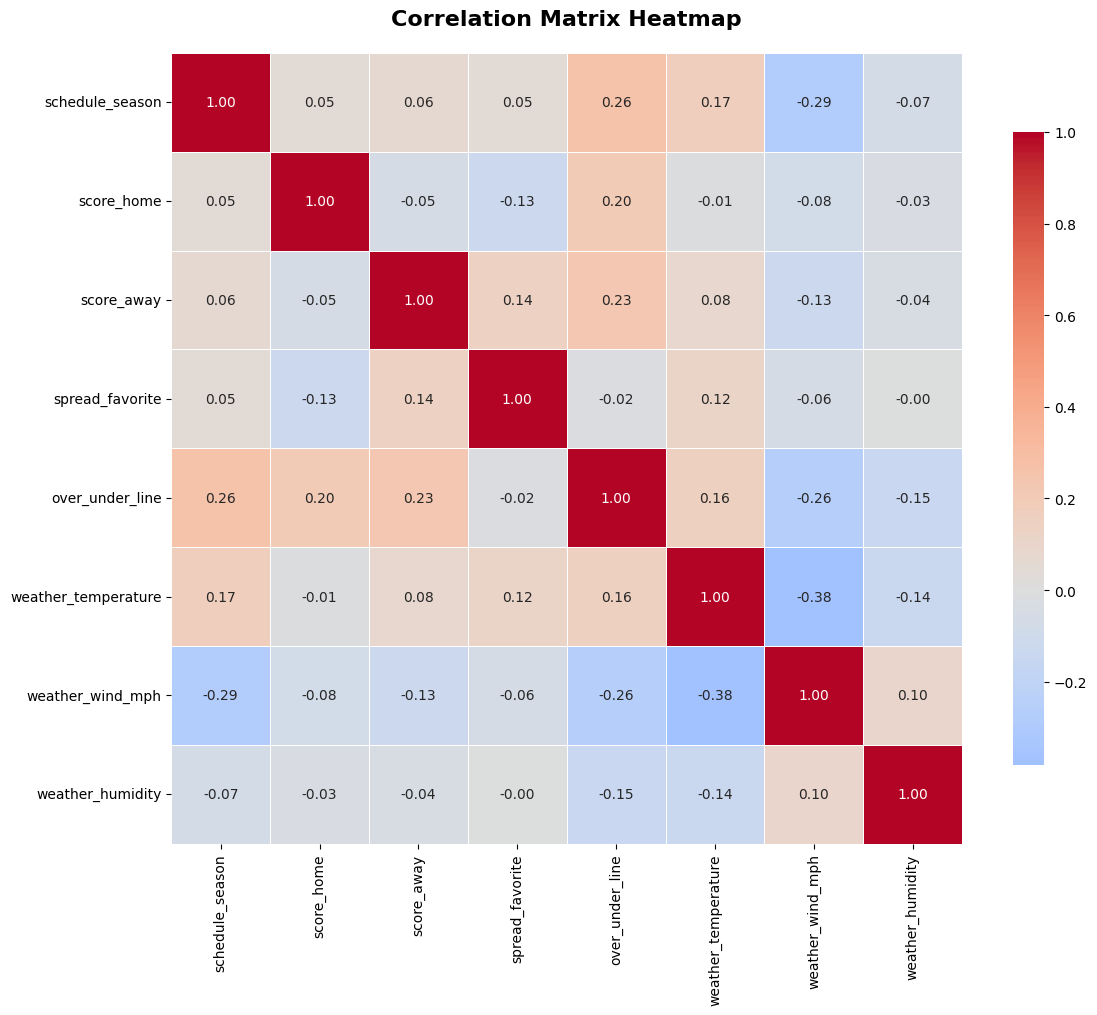

In [8]:
# Create correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt='.2f',   
            cmap='coolwarm',  
            center=0,    
            square=True,
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8}) 
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Skewness (measure of asymmetry):")
print(df[numeric_cols].skew())
print("\nKurtosis (measure of tail heaviness):")
print(df[numeric_cols].kurtosis())


Skewness (measure of asymmetry):
schedule_season       -0.017953
score_home             0.274384
score_away             0.279703
spread_favorite       -1.207279
over_under_line        0.183263
weather_temperature   -0.965366
weather_wind_mph       0.972770
weather_humidity      -0.341057
dtype: float64

Kurtosis (measure of tail heaviness):
schedule_season       -1.234049
score_home             0.048094
score_away            -0.117737
spread_favorite        1.584508
over_under_line        0.122842
weather_temperature    0.450456
weather_wind_mph       1.063407
weather_humidity      -0.033204
dtype: float64


## Over/Under Analysis: High Scoring Games (>50 points)


In [10]:
# Filter for games with complete score data
games_complete = df.dropna(subset=['score_home', 'score_away', 'over_under_line']).copy()

# Calculate total points scored
games_complete['total_points'] = games_complete['score_home'] + games_complete['score_away']

# Determine if the over was hit
games_complete['hit_over'] = games_complete['total_points'] > games_complete['over_under_line']

# Create high scoring games category (over/under > 50)
games_complete['high_scoring_line'] = games_complete['over_under_line'] > 50

print(f"Total games with complete data: {len(games_complete)}")
print(f"Games with over/under > 50: {games_complete['high_scoring_line'].sum()}")
print(f"Games with over/under <= 50: {(~games_complete['high_scoring_line']).sum()}")


Total games with complete data: 4448
Games with over/under > 50: 447
Games with over/under <= 50: 4001


In [11]:
# Calculate hit rates by over/under category
hit_rates = games_complete.groupby('high_scoring_line')['hit_over'].agg(['mean', 'count', 'sum'])
hit_rates.columns = ['Hit_Rate', 'Total_Games', 'Games_Over']
hit_rates.index = ['Over/Under <= 50', 'Over/Under > 50']
hit_rates['Hit_Rate_Percent'] = hit_rates['Hit_Rate'] * 100

print("Over Hit Rates by Over/Under Line:")
print(hit_rates)
print(f"\nHigh scoring games (>50) hit the over {hit_rates.loc['Over/Under > 50', 'Hit_Rate_Percent']:.2f}% of the time")
print(f"Lower scoring games (<=50) hit the over {hit_rates.loc['Over/Under <= 50', 'Hit_Rate_Percent']:.2f}% of the time")


Over Hit Rates by Over/Under Line:
                  Hit_Rate  Total_Games  Games_Over  Hit_Rate_Percent
Over/Under <= 50  0.482629         4001        1931         48.262934
Over/Under > 50   0.487696          447         218         48.769575

High scoring games (>50) hit the over 48.77% of the time
Lower scoring games (<=50) hit the over 48.26% of the time


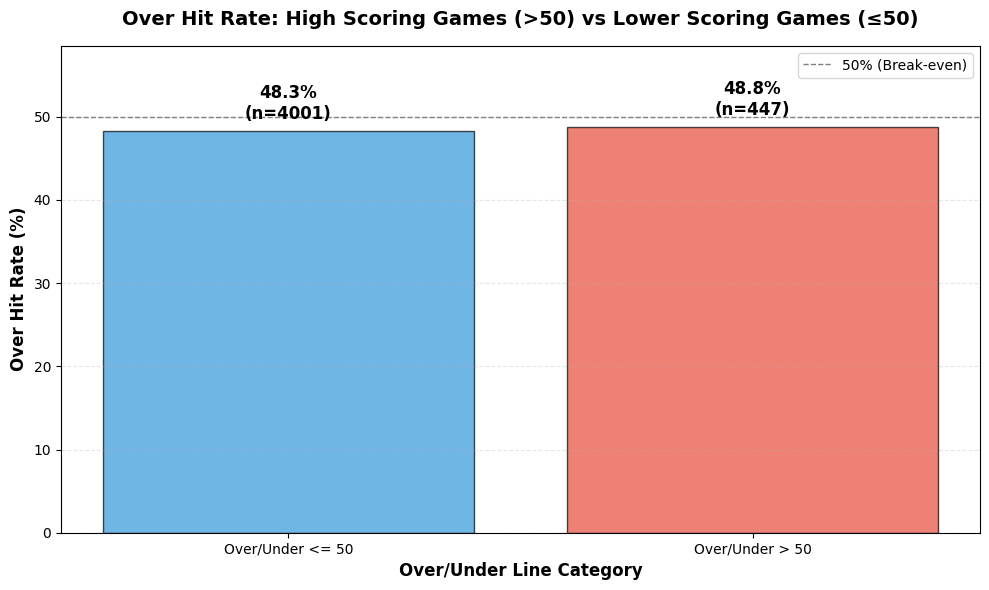

In [12]:
# Create visualization: Bar chart comparing hit rates
fig, ax = plt.subplots(figsize=(10, 6))

categories = hit_rates.index
hit_percentages = hit_rates['Hit_Rate_Percent']
total_games = hit_rates['Total_Games']

bars = ax.bar(categories, hit_percentages, color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')

# Add percentage labels on bars
for i, (bar, pct, games) in enumerate(zip(bars, hit_percentages, total_games)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{pct:.1f}%\n(n={int(games)})',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add 50% reference line (break-even point)
ax.axhline(y=50, color='gray', linestyle='--', linewidth=1, label='50% (Break-even)')

ax.set_ylabel('Over Hit Rate (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Over/Under Line Category', fontsize=12, fontweight='bold')
ax.set_title('Over Hit Rate: High Scoring Games (>50) vs Lower Scoring Games (≤50)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([0, max(hit_percentages) * 1.2])
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend()

plt.tight_layout()
plt.show()


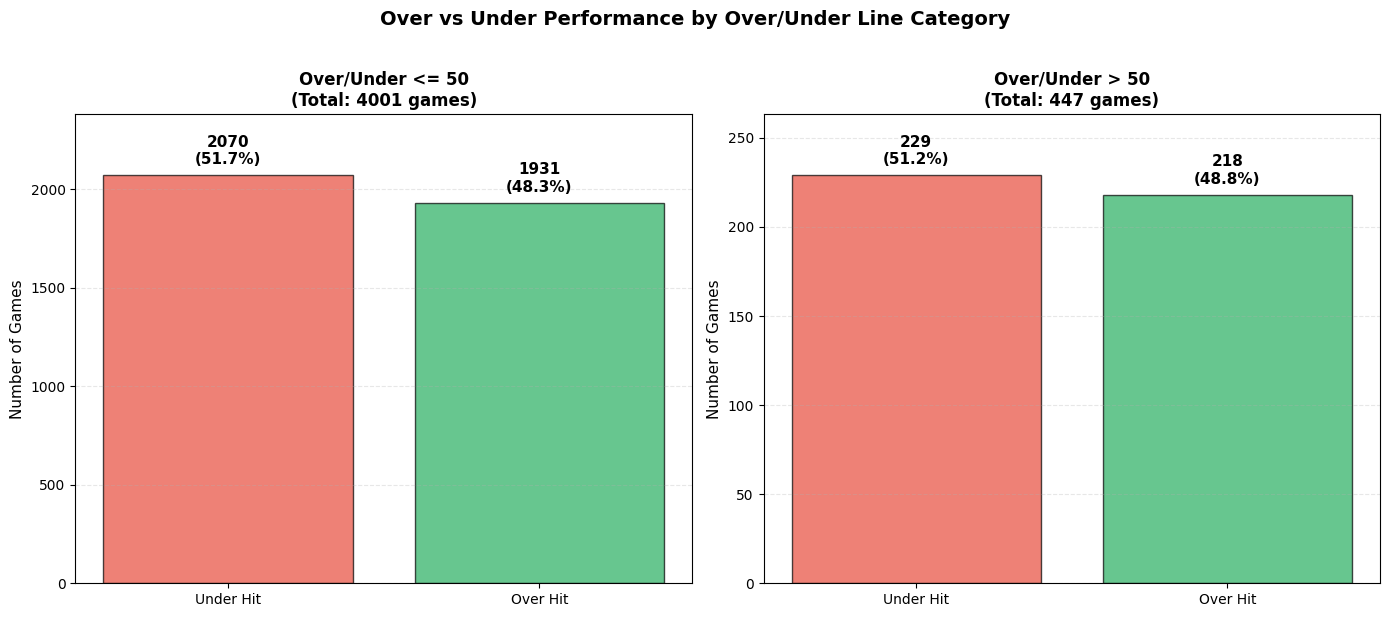

In [13]:
# Create a detailed breakdown visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Count of games that hit over vs under
for idx, (category, data) in enumerate([('Over/Under <= 50', ~games_complete['high_scoring_line']), 
                                         ('Over/Under > 50', games_complete['high_scoring_line'])]):
    ax = axes[idx]
    subset = games_complete[data]
    hit_counts = subset['hit_over'].value_counts()
    
    labels = ['Under Hit', 'Over Hit']
    colors = ['#e74c3c', '#27ae60']
    counts = [hit_counts.get(False, 0), hit_counts.get(True, 0)]
    
    bars = ax.bar(labels, counts, color=colors, alpha=0.7, edgecolor='black')
    
    # Add count labels
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max(counts) * 0.02,
                f'{int(count)}\n({count/len(subset)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax.set_title(f'{category}\n(Total: {len(subset)} games)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Games', fontsize=11)
    ax.set_ylim([0, max(counts) * 1.15])
    ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle('Over vs Under Performance by Over/Under Line Category', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


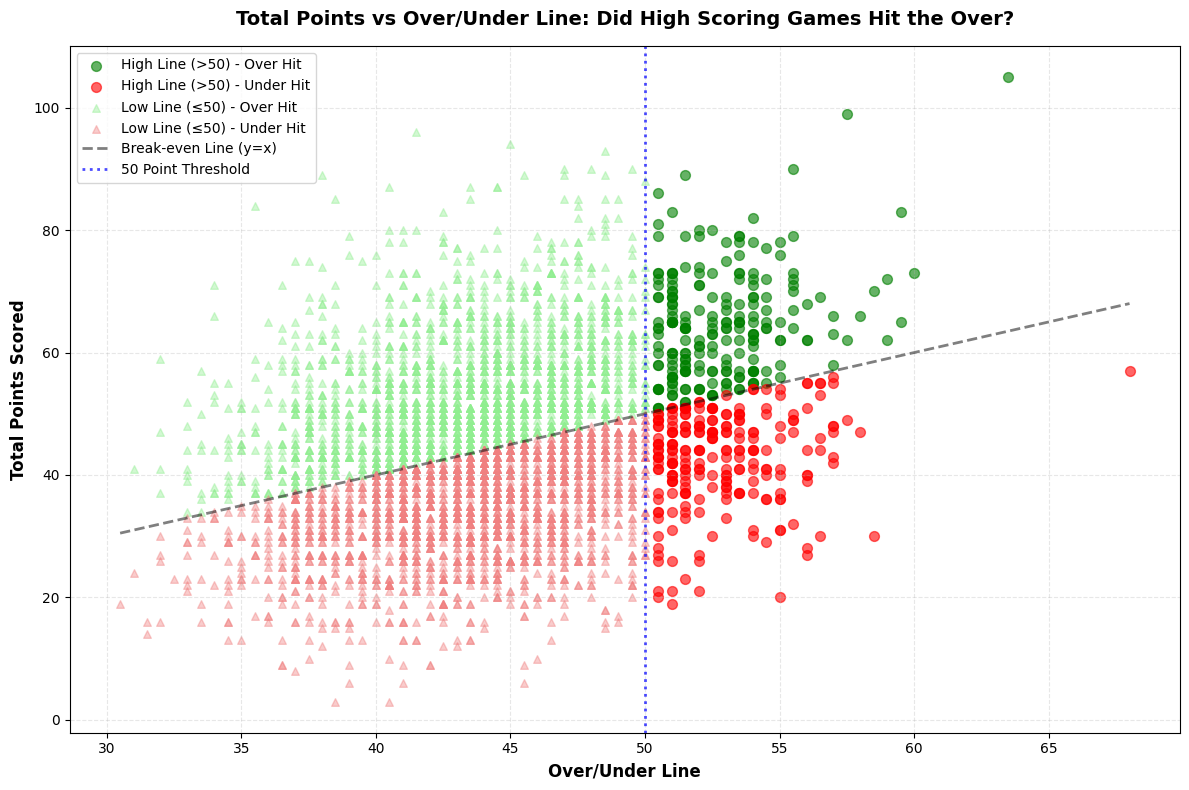

In [14]:
# Scatter plot: Total points vs Over/Under line, colored by whether over was hit
plt.figure(figsize=(12, 8))

# Separate high and low over/under games
high_line = games_complete[games_complete['high_scoring_line']]
low_line = games_complete[~games_complete['high_scoring_line']]

# Plot games that hit the over
high_over = high_line[high_line['hit_over']]
high_under = high_line[~high_line['hit_over']]
low_over = low_line[low_line['hit_over']]
low_under = low_line[~low_line['hit_over']]

plt.scatter(high_over['over_under_line'], high_over['total_points'], 
           alpha=0.6, color='green', s=50, label='High Line (>50) - Over Hit', marker='o')
plt.scatter(high_under['over_under_line'], high_under['total_points'], 
           alpha=0.6, color='red', s=50, label='High Line (>50) - Under Hit', marker='o')
plt.scatter(low_over['over_under_line'], low_over['total_points'], 
           alpha=0.4, color='lightgreen', s=30, label='Low Line (≤50) - Over Hit', marker='^')
plt.scatter(low_under['over_under_line'], low_under['total_points'], 
           alpha=0.4, color='lightcoral', s=30, label='Low Line (≤50) - Under Hit', marker='^')

# Add diagonal line (y=x) where total points equals over/under line
min_line = games_complete['over_under_line'].min()
max_line = games_complete['over_under_line'].max()
plt.plot([min_line, max_line], [min_line, max_line], 
        'k--', linewidth=2, alpha=0.5, label='Break-even Line (y=x)')

# Add vertical line at 50
plt.axvline(x=50, color='blue', linestyle=':', linewidth=2, alpha=0.7, label='50 Point Threshold')

plt.xlabel('Over/Under Line', fontsize=12, fontweight='bold')
plt.ylabel('Total Points Scored', fontsize=12, fontweight='bold')
plt.title('Total Points vs Over/Under Line: Did High Scoring Games Hit the Over?', 
         fontsize=14, fontweight='bold', pad=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


## Over vs Under: Overall and Trends Over Years


In [15]:
# Prepare data for analysis
# Make sure we have the games_complete dataframe with hit_over column
if 'games_complete' not in locals():
    games_complete = df.dropna(subset=['score_home', 'score_away', 'over_under_line']).copy()
    games_complete['total_points'] = games_complete['score_home'] + games_complete['score_away']
    games_complete['hit_over'] = games_complete['total_points'] > games_complete['over_under_line']

# Overall counts
overall_counts = games_complete['hit_over'].value_counts()
over_count = overall_counts.get(True, 0)
under_count = overall_counts.get(False, 0)

print("Overall Over vs Under:")
print(f"Over Hit: {over_count} games ({over_count/(over_count+under_count)*100:.2f}%)")
print(f"Under Hit: {under_count} games ({under_count/(over_count+under_count)*100:.2f}%)")


Overall Over vs Under:
Over Hit: 2149 games (48.31%)
Under Hit: 2299 games (51.69%)


In [16]:
# Group by year and calculate over/under counts
yearly_stats = games_complete.groupby('schedule_season').agg({
    'hit_over': ['sum', 'count']
}).reset_index()

yearly_stats.columns = ['year', 'over_count', 'total_games']
yearly_stats['under_count'] = yearly_stats['total_games'] - yearly_stats['over_count']
yearly_stats['over_percentage'] = (yearly_stats['over_count'] / yearly_stats['total_games']) * 100

print("Over vs Under by Year:")
print(yearly_stats)


Over vs Under by Year:
    year  over_count  total_games  under_count  over_percentage
0   2005         102          220          118        46.363636
1   2006          99          213          114        46.478873
2   2007         118          221          103        53.393665
3   2008         106          225          119        47.111111
4   2009         106          223          117        47.533632
5   2010         110          208           98        52.884615
6   2011         107          213          106        50.234742
7   2012          99          202          103        49.009901
8   2013         108          211          103        51.184834
9   2014          93          203          110        45.812808
10  2015         101          223          122        45.291480
11  2016         110          214          104        51.401869
12  2017          90          207          117        43.478261
13  2018          99          214          115        46.261682
14  2019         

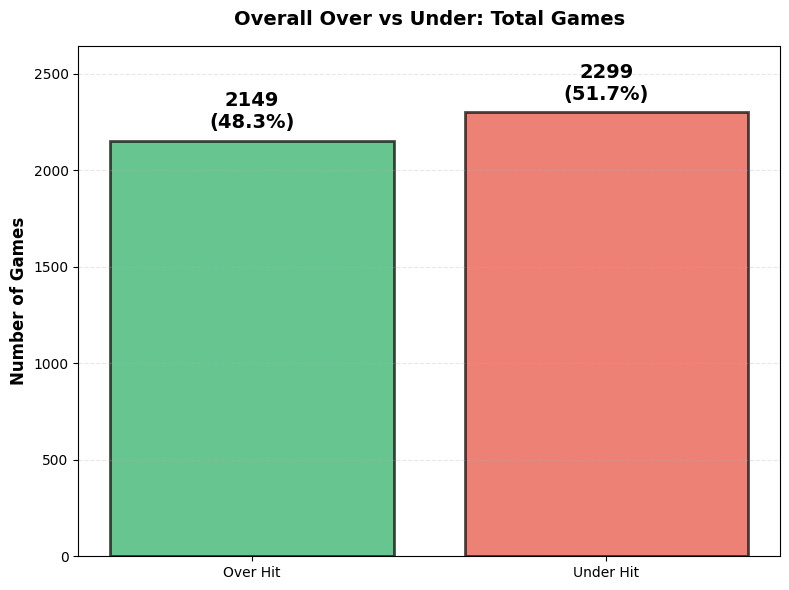

In [17]:
# Create a simple chart: Overall Over vs Under
fig, ax = plt.subplots(figsize=(8, 6))

categories = ['Over Hit', 'Under Hit']
counts = [over_count, under_count]
colors = ['#27ae60', '#e74c3c']  # Green for over, red for under

bars = ax.bar(categories, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add count labels on bars
for bar, count, total in zip(bars, counts, [sum(counts)]*2):
    height = bar.get_height()
    percentage = (count / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + max(counts) * 0.02,
            f'{int(count)}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Number of Games', fontsize=12, fontweight='bold')
ax.set_title('Overall Over vs Under: Total Games', fontsize=14, fontweight='bold', pad=15)
ax.set_ylim([0, max(counts) * 1.15])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


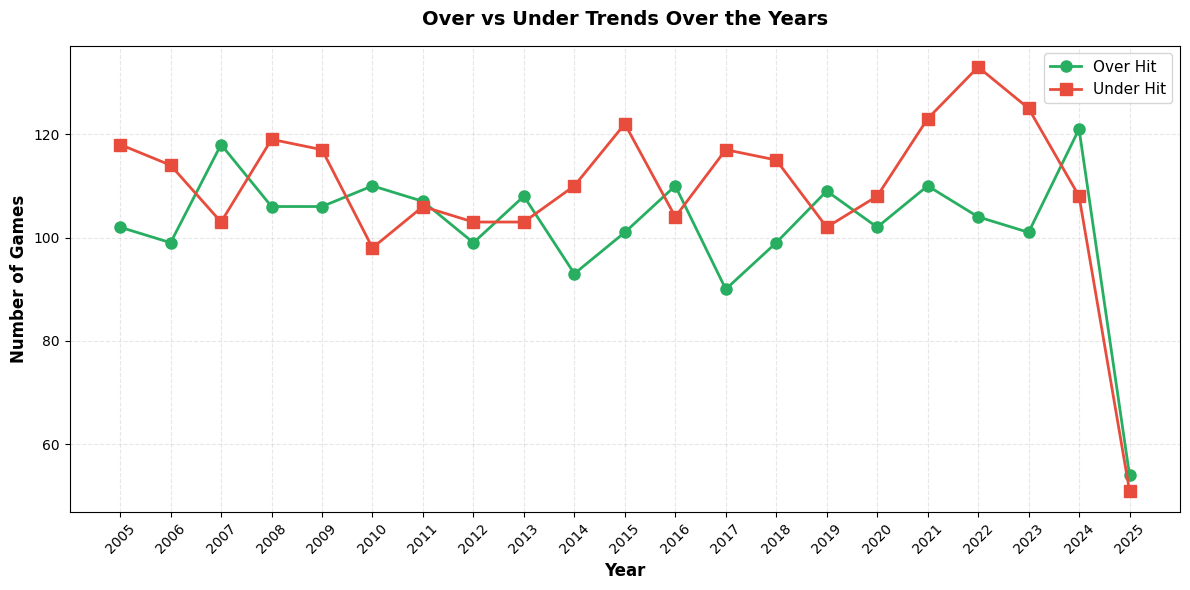

In [18]:
# Create line chart showing trends over years
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(yearly_stats['year'], yearly_stats['over_count'], 
        marker='o', linewidth=2, markersize=8, label='Over Hit', color='#27ae60')
ax.plot(yearly_stats['year'], yearly_stats['under_count'], 
        marker='s', linewidth=2, markersize=8, label='Under Hit', color='#e74c3c')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Games', fontsize=12, fontweight='bold')
ax.set_title('Over vs Under Trends Over the Years', fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11, loc='best')
ax.grid(alpha=0.3, linestyle='--')
ax.set_xticks(yearly_stats['year'])
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


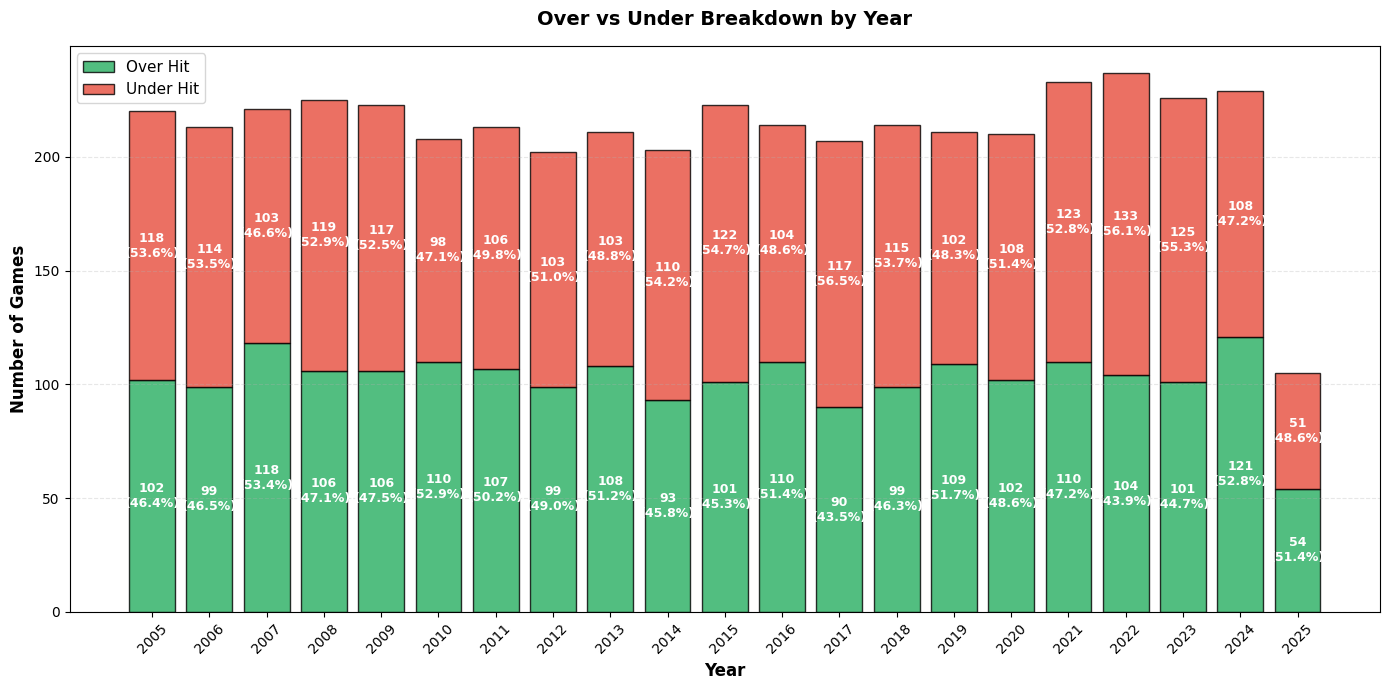

In [19]:
# Create a stacked bar chart showing over vs under by year
fig, ax = plt.subplots(figsize=(14, 7))

x = yearly_stats['year']
over = yearly_stats['over_count']
under = yearly_stats['under_count']

ax.bar(x, over, label='Over Hit', color='#27ae60', alpha=0.8, edgecolor='black')
ax.bar(x, under, bottom=over, label='Under Hit', color='#e74c3c', alpha=0.8, edgecolor='black')

# Add percentage labels on each segment
for i, (year, ov, und, tot) in enumerate(zip(x, over, under, yearly_stats['total_games'])):
    if ov > 0:
        ax.text(year, ov/2, f'{ov}\n({ov/tot*100:.1f}%)', 
                ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    if und > 0:
        ax.text(year, ov + und/2, f'{und}\n({und/tot*100:.1f}%)', 
                ha='center', va='center', fontsize=9, fontweight='bold', color='white')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Games', fontsize=12, fontweight='bold')
ax.set_title('Over vs Under Breakdown by Year', fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11, loc='upper left')
ax.set_xticks(x)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


## Additional Visualizations from Test Notebook


In [20]:
# Use df (already loaded) instead of train_data
# Ensure total_score column exists
if 'total_score' not in df.columns:
    df['total_score'] = df['score_home'] + df['score_away']
df.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_score
0,1/15/2006,2005,Division,True,Indianapolis Colts,18.0,21.0,Pittsburgh Steelers,IND,-8.5,46.5,RCA Dome,False,72.0,0.0,NaN,indoor,39.0
1,12/19/2021,2021,15,False,Jacksonville Jaguars,16.0,30.0,Houston Texans,JAX,-6.0,40.0,TIAA Bank Field,False,80.0,12.0,71.0,NaN,46.0
2,1/2/2022,2021,17,False,Indianapolis Colts,20.0,23.0,Las Vegas Raiders,IND,-8.5,46.5,Lucas Oil Stadium,False,72.0,0.0,NaN,indoor,43.0
3,12/28/2025,2025,17,False,Tennessee Titans,NaN,NaN,New Orleans Saints,NaN,NaN,NaN,Nissan Stadium,False,NaN,NaN,NaN,NaN,NaN
4,9/8/2013,2013,1,False,St. Louis Rams,27.0,24.0,Arizona Cardinals,LAR,-3.5,41.5,Edward Jones Dome,False,72.0,0.0,NaN,indoor,51.0


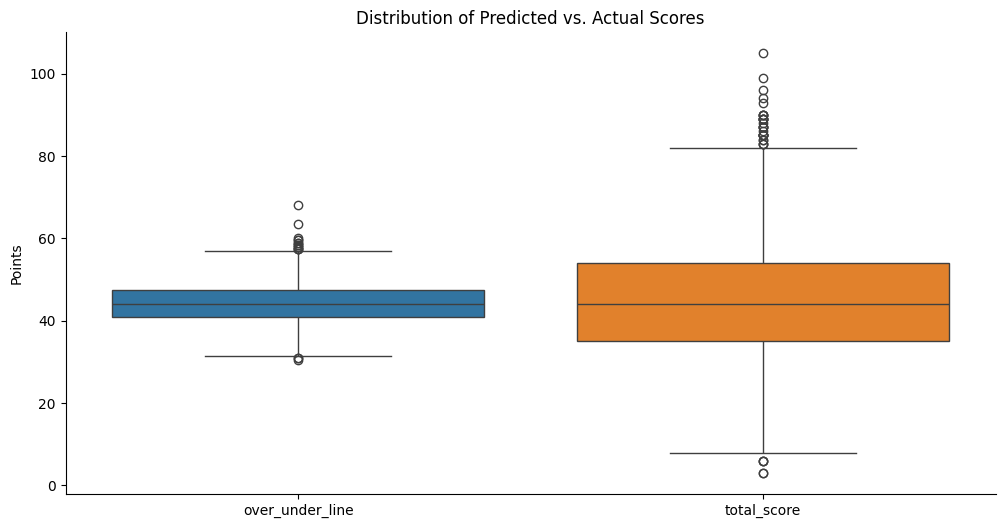

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['over_under_line', 'total_score']])
plt.title('Distribution of Predicted vs. Actual Scores')
plt.ylabel('Points')
sns.despine()


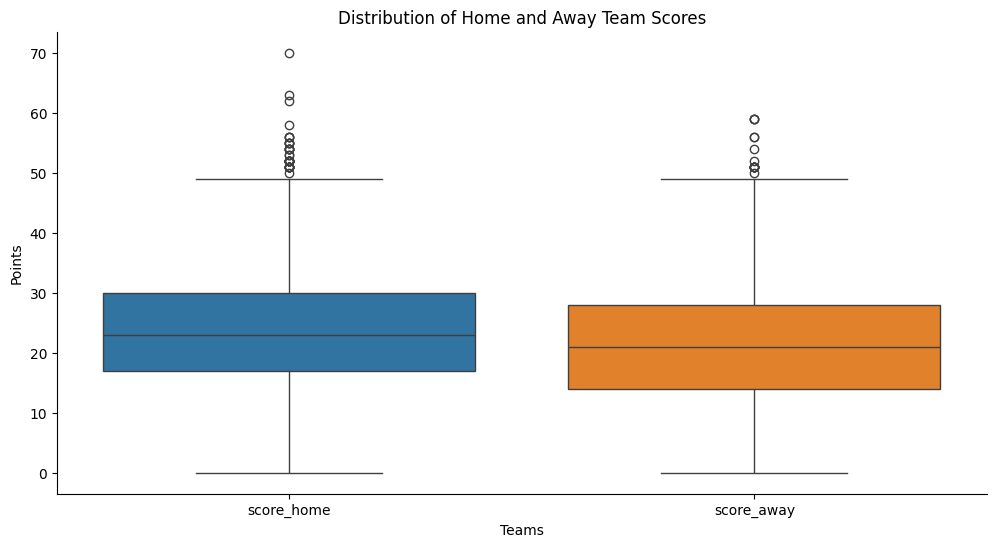

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['score_home', 'score_away']])
plt.title('Distribution of Home and Away Team Scores')
plt.ylabel('Points')
plt.xlabel('Teams')
sns.despine()


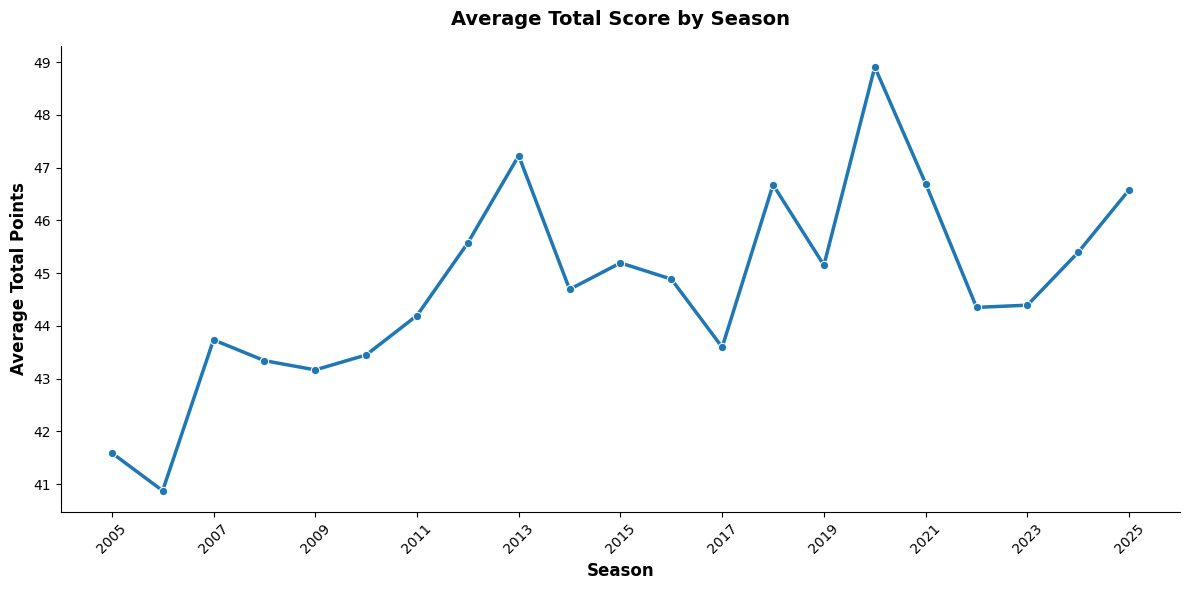

In [23]:
year_avg = df.groupby(df['schedule_date'].str[-4:])['total_score'].mean().reset_index()
year_avg.columns = ['year', 'average_score']
year_avg['year'] = year_avg['year'].astype(int) 
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_avg, x='year', y='average_score', marker='o', linewidth=2.5)

plt.xlabel('Season', fontsize=12, fontweight='bold')
plt.ylabel('Average Total Points', fontsize=12, fontweight='bold')
plt.title('Average Total Score by Season', fontsize=14, fontweight='bold', pad=15)

plt.xticks(year_avg['year'][::2], rotation=45) 
plt.tight_layout()
sns.despine()


/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/seaborn/external/kde.py:248: RuntimeWarning: divide by zero encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/seaborn/external/kde.py:248: RuntimeWarning: overflow encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/dylandietrich/Tennis_prediciton/.venv/li

Text(0.5, 1.0, 'Distribution of Vegas Line Residuals')

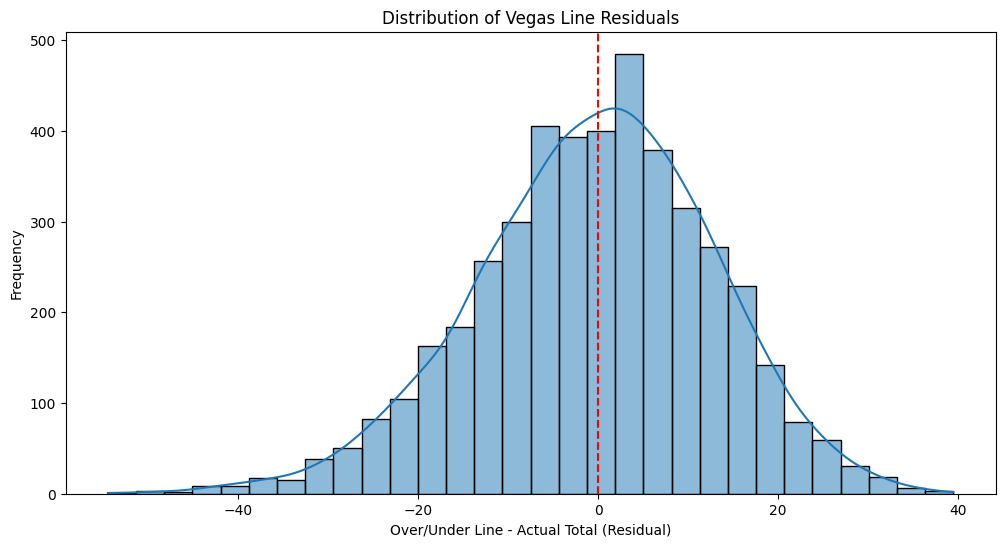

In [24]:
# Calculate diff column if it doesn't exist
if 'diff' not in df.columns:
    df['diff'] = df['over_under_line'] - df['total_score']

plt.figure(figsize=(12, 6))
sns.histplot(df['diff'], bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Over/Under Line - Actual Total (Residual)')
plt.ylabel('Frequency')
plt.title('Distribution of Vegas Line Residuals')


/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/seaborn/external/kde.py:248: RuntimeWarning: divide by zero encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/dylandietrich/Tennis_prediciton/.venv/lib/python3.11/site-packages/seaborn/external/kde.py:248: RuntimeWarning: overflow encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/dylandietrich/Tennis_prediciton/.venv/li

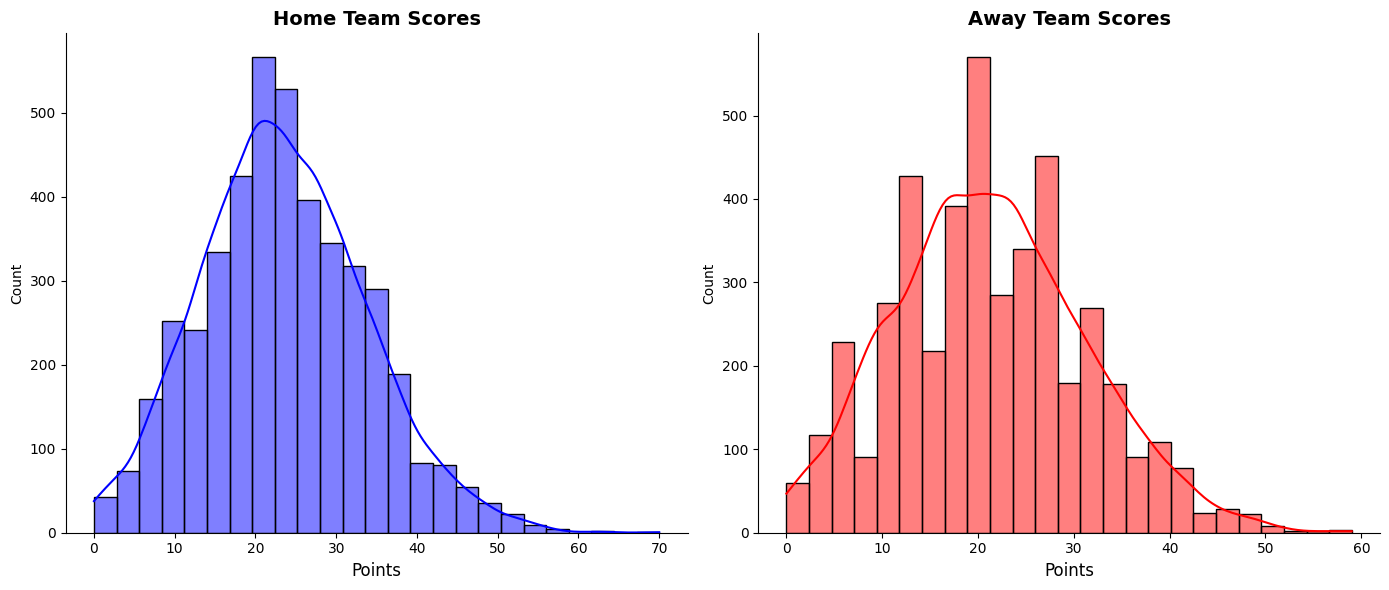

In [25]:
# Get home and away averages by year
year_scores = df.groupby(df['schedule_date'].str[-4:]).agg({'score_home': 'mean','score_away': 'mean'}).reset_index()
year_scores.columns = ['year', 'home_avg', 'away_avg']
year_scores['year'] = year_scores['year'].astype(int)

# Side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['score_home'], bins=25, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Home Team Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Points', fontsize=12)

sns.histplot(df['score_away'], bins=25, kde=True, ax=axes[1], color='red')
axes[1].set_title('Away Team Scores', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Points', fontsize=12)

plt.tight_layout()
sns.despine()


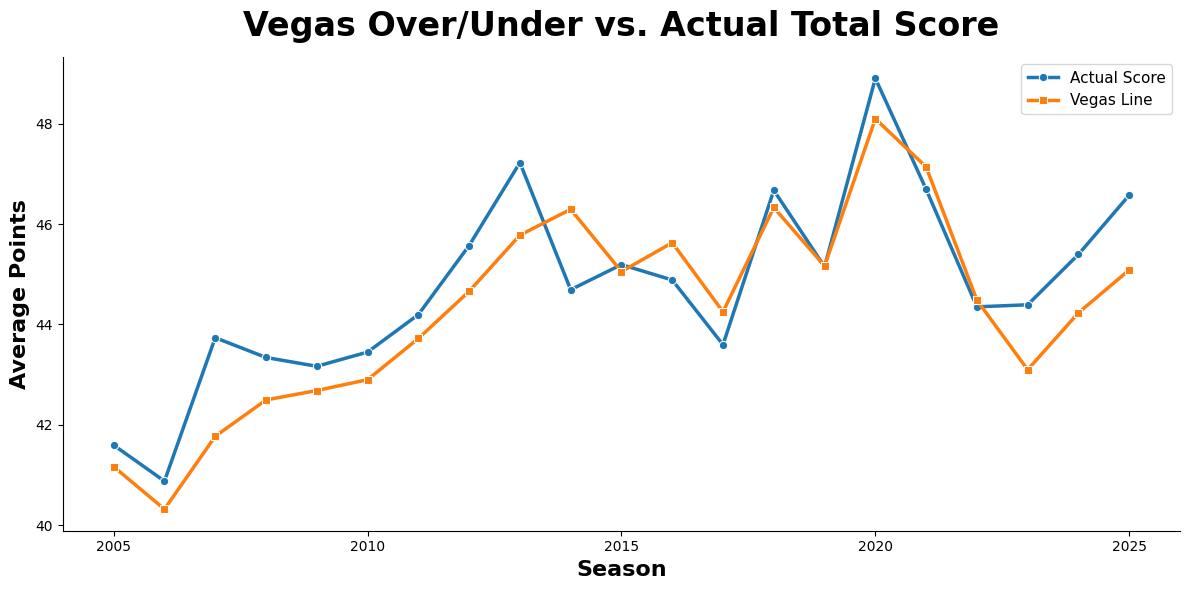

In [26]:
year_scores = df.groupby(df['schedule_date'].str[-4:]).agg({
    'total_score': 'mean',
    'over_under_line': 'mean'
}).reset_index()
year_scores.columns = ['year', 'total_score', 'over_under_line']
year_scores['year'] = year_scores['year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_score', data=year_scores, label='Actual Score', marker='o', linewidth=2.5)
sns.lineplot(x='year', y='over_under_line', data=year_scores, label='Vegas Line', marker='s', linewidth=2.5)

plt.title('Vegas Over/Under vs. Actual Total Score', fontsize=24, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=16, fontweight='bold')
plt.ylabel('Average Points', fontsize=16, fontweight='bold')
plt.xticks([2005, 2010, 2015, 2020, 2025])
plt.legend(fontsize=11)
plt.tight_layout()
sns.despine()
plt.show()
